In [3]:
%load_ext autoreload
%autoreload 2 
import sys
sys.path.append('C:/dev/projects/allocation')

import seaborn as sns
from dask.distributed import Client
from pandas.tseries.offsets import DateOffset
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

from allocation.debug import *
from allocation import *

sns.set(style='whitegrid')
rng = np.random.default_rng(7)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
client = Client()
client

c:\dev\projects\allocation\venv\lib\site-packages\distributed\node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 54786 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:54789' processes=4 threads=4, memory=25.77 GB>

In [4]:
def aud_bond_contract_value(price):
    i = (100 - price) / 200
    v = 1 / (1 + i)
    c = 3
    return c * (1 - v ** 20) / i + 100 * v ** 20

assets = pd.read_csv('../data/assets.csv', index_col=0, parse_dates=True, dayfirst=True)
assets['AUD_Bond_10y_Fut'] = assets['AUD_Bond_10y_Fut'].apply(aud_bond_contract_value)
r = assets.pct_change().dropna()
rt = r[:250]

In [11]:
ptf = Portfolio.from_assets(assets=r)
ptf.get_signals()

US_Equity_Fut  US_Bond_30y_Fut  EMU_Equity_Fut  \
date                                                         
2009-09-09            1.0              1.0             1.0   
2009-09-10            1.0              1.0             1.0   
2009-09-11            1.0              1.0             1.0   
2009-09-14            1.0              1.0             1.0   
2009-09-15            1.0              1.0             1.0   
...                   ...              ...             ...   
2021-02-26            1.0              1.0             1.0   
2021-03-01            1.0              1.0             1.0   
2021-03-02            1.0              1.0             1.0   
2021-03-03            1.0              1.0             1.0   
2021-03-04            1.0              1.0             1.0   

            UK_Equity_F100_Fut  CAD_Equity_Fut  EMU_Buxl_Fut  FX_EUR_TR  \
date                                                                      
2009-09-09                 1.0             1.0           1.0        1.0   
2009-09-10                 1.0             1.0           1.0        1.0   
2009-09-11                 1.0             1.0           1.0        1.0   
2009-09-14                 1.0             1.0           1.0        1.0   
2009-09-15                 1.0             1.0           1.0        1.0   
...                        ...             ...           ...        ...   
2021-02-26                 1.0             1.0           1.0        1.0   
2021-03-01                 1.0             1.0           1.0        1.0   
2021-03-02                 1.0             1.0           1.0        1.0   
2021-03-03                 1.0             1.0           1.0        1.0   
2021-03-04                 1.0             1.0           1.0        1.0   

            FX_CAD_TR  FX_JPY_TR  FX_AUD_TR  AUD_Bond_10y_Fut  AUD_Equity_Fut  \
date                                                                            
2009-09-09        1.0        1.0        1.0               1.0             1.0   
2009-09-10        1.0        1.0        1.0               1.0             1.0   
2009-09-11        1.0        1.0        1.0               1.0             1.0   
2009-09-14        1.0        1.0        1.0               1.0             1.0   
2009-09-15        1.0        1.0        1.0               1.0             1.0   
...               ...        ...        ...               ...             ...   
2021-02-26        1.0        1.0        1.0               1.0             1.0   
2021-03-01        1.0        1.0        1.0               1.0             1.0   
2021-03-02        1.0        1.0        1.0               1.0             1.0   
2021-03-03        1.0        1.0        1.0               1.0             1.0   
2021-03-04        1.0        1.0        1.0               1.0             1.0   

            FX_EURSEK_TR  EM_Equity_Fut  FX_NOK_TR  FX_MXN_TR  
date                                                           
2009-09-09           1.0            1.0        1.0        1.0  
2009-09-10           1.0            1.0        1.0        1.0  
2009-09-11           1.0            1.0        1.0        1.0  
2009-09-14           1.0            1.0        1.0        1.0  
2009-09-15           1.0            1.0        1.0        1.0  
...                  ...            ...        ...        ...  
2021-02-26           1.0            1.0        1.0        1.0  
2021-03-01           1.0            1.0        1.0        1.0  
2021-03-02           1.0            1.0        1.0        1.0  
2021-03-03           1.0            1.0        1.0        1.0  
2021-03-04           1.0            1.0        1.0        1.0  

[2997 rows x 16 columns]

In [21]:
from allocation.accessors.bt import ActiveSignalsRiskScaler

In [23]:
a1 = InverseRisk()

In [26]:
bt1 = BackTest(
    allocator=a1,
    risk_accessors=[]
    risk_managers=ActiveSignalsRiskScaler
)

In [27]:
a2 = HERC()
bt2 = BackTest(
    allocator=a2,
    risk_managers=ActiveSignalsRiskScaler
)

In [28]:
bt1.run(ptf)

In [29]:
bt2.run(ptf)

In [33]:
bt1.risk_managers.run_all()
bt2.risk_managers.run_all()

AttributeError: 'BackTest' object has no attribute 'ptf'

In [36]:
bt1.weights_.index[0]

Timestamp('2010-08-25 00:00:00')

In [54]:
(1 + (r.loc[bt1.weights_.index[0]:] * bt1.weights_).sum(axis=1)).cumprod()

C:/dev/projects/allocation\allocation\accessors\returns.py:11: UserWarning: registration of accessor <class 'allocation.accessors.returns.ReturnsAccessor'> under name 'r' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class ReturnsAccessor:
C:/dev/projects/allocation\allocation\accessors\returns.py:11: UserWarning: registration of accessor <class 'allocation.accessors.returns.ReturnsAccessor'> under name 'r' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  class ReturnsAccessor:


date
2010-08-25    1.001926
2010-08-26    1.002912
2010-08-27    1.004682
2010-08-30    1.005639
2010-08-31    1.007226
                ...   
2021-02-26    1.393656
2021-03-01    1.401172
2021-03-02    1.399037
2021-03-03    1.399272
2021-03-04    1.398655
Length: 2747, dtype: float64

<AxesSubplot:xlabel='date'>

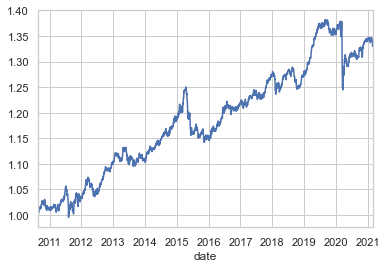

In [45]:
(1 + (r.loc[bt2.weights_.index[0]:] * bt2.weights_).sum(axis=1)).cumprod().plot()

In [51]:
ptf.get_assets().r.ptf(bt1.weights_, compound=True)

AttributeError: 'ReturnsAccessor' object has no attribute 'price'

In [53]:
r.r.ptf(bt1.weights_, level=True, compound=True)

date
2010-08-24    1.000000
2010-08-25    1.001926
2010-08-26    1.002931
2010-08-27    1.004694
2010-08-30    1.005663
                ...   
2021-02-26    1.307413
2021-03-01    1.315576
2021-03-02    1.318519
2021-03-03    1.318073
2021-03-04    1.316121
Length: 2748, dtype: float64

1. extract the signal 
2. change sign asset 

In [18]:
allocator = InverseRisk(measure=ShrunkCovariance())

In [ ]:
allo

In [12]:
a = InverseRisk().allocate(rt)
a.weights_

US_Equity_Fut         0.042637
US_Bond_30y_Fut       0.074756
EMU_Equity_Fut        0.032223
UK_Equity_F100_Fut    0.044459
CAD_Equity_Fut        0.050170
EMU_Buxl_Fut          0.078999
FX_EUR_TR             0.072993
FX_CAD_TR             0.057096
FX_JPY_TR             0.072009
FX_AUD_TR             0.049628
AUD_Bond_10y_Fut      0.116368
AUD_Equity_Fut        0.044887
FX_EURSEK_TR          0.106210
EM_Equity_Fut         0.029411
FX_NOK_TR             0.062519
FX_MXN_TR             0.065635
dtype: float64

In [13]:
a = MaxRiskAdjusted().allocate(rt)
a.weights_

US_Equity_Fut         0.000000e+00
US_Bond_30y_Fut       9.615444e-18
EMU_Equity_Fut        3.142757e-18
UK_Equity_F100_Fut    3.971398e-02
CAD_Equity_Fut        0.000000e+00
EMU_Buxl_Fut          8.297157e-01
FX_EUR_TR             0.000000e+00
FX_CAD_TR             0.000000e+00
FX_JPY_TR             4.291644e-18
FX_AUD_TR             3.874054e-18
AUD_Bond_10y_Fut      0.000000e+00
AUD_Equity_Fut        7.472758e-18
FX_EURSEK_TR          0.000000e+00
EM_Equity_Fut         1.305703e-01
FX_NOK_TR             0.000000e+00
FX_MXN_TR             0.000000e+00
dtype: float64

In [ ]:
a = MinRisk().allocate(rt)
a.weights_

In [ ]:
a = RiskBudgeting().allocate(rt)
a.weights_

In [ ]:
a = HRP().allocate(rt)
a.weights_

In [ ]:
a = HERC().allocate(rt)
a.weights_

In [ ]:
bt = BackTest()